### NAME:ANKIT
### ROLL No.:D21006
### NAME: VAISHNAVI DASARI
### ROLL No.: D21037

# The House Price Prediction Problem

In [116]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [2]:
#Read the training data
train = pd.read_csv(r'C:\Users\nirup\Downloads\kc_house_train_data.csv')
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


**Predictors:**<br>
'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement',' 
'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'<br>
**Target:**<br>
'price'

In [3]:
#Shape(number of rows , number of columns)
train.shape

(9761, 21)

## EXPLORATORY DATA ANALYSIS

In [4]:
#summary 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


From train.info we can see the datatypes and there are no null values

In [5]:
#some basic statistical details
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


From train.describe() we can see the basic statistical details, from which we can see that maximum price is 77,00,000 and minimum price is 80,000 and 50% of houses price is 4,50,000.Average pricing is 5,42,833.

In [6]:
#Checking outliers for price
IQR = train.price.quantile(0.75)- train.price.quantile(0.25)
upper = train.price.quantile(0.75) + 1.5*IQR   #Q1 + 1.5*IQR
lower = train.price.quantile(0.25) - 1.5*IQR   #Q1 - 1.5*IQR
outliers=sum(train.price > upper)
print(outliers)

522


There are 522 houses which are over priced than upper limit

### UNIVARIANT ANALYSIS

Fot every column we are ploting a boxplot to see the median and outliers or the data for each column

In [7]:
#function for getting boxplot for all numerical columns
def graphsuni(data,columns=None,directory=os.getcwd()):
    cols=data.columns
    if columns==None:
        columns=cols
    path = os.chdir(directory)
    num_cols = data._get_numeric_data().columns
    num_cols = num_cols.tolist()
    for i in columns:
        if (i in num_cols):               
                data.boxplot(column=i,notch =True,grid=False,figsize=(6,4),vert=False)
                plt.xlabel(i,fontsize=12)
                str1 = "Boxplot of "+i
                plt.title(str1,fontsize=14)
                plt.savefig(str1,bbox_inches='tight',pad_inches=2,transparent=False,dpi=100)
                plt.show()

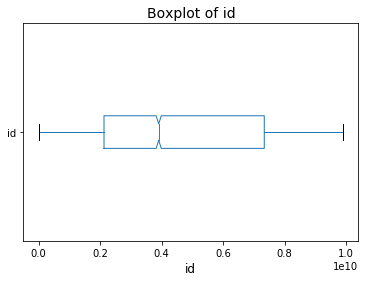

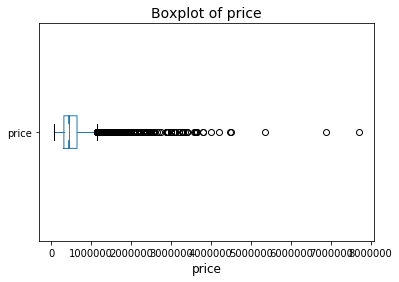

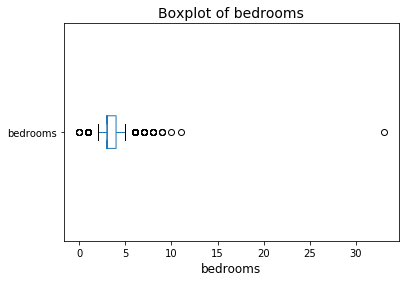

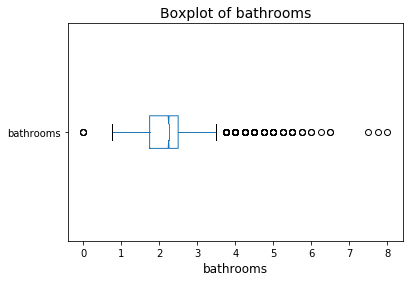

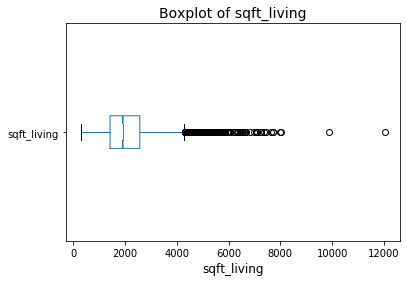

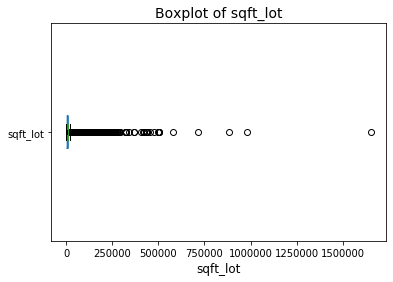

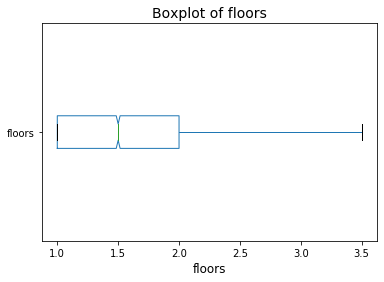

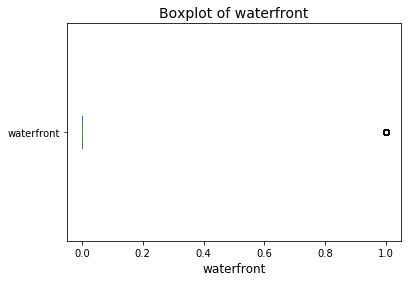

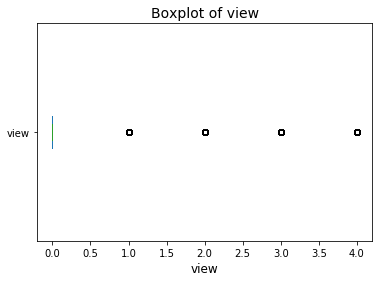

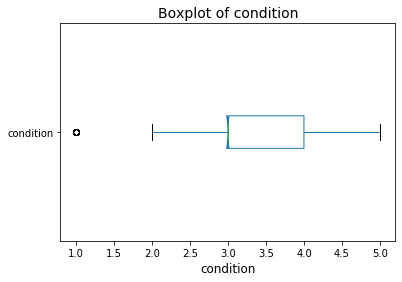

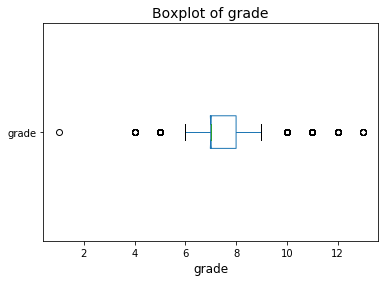

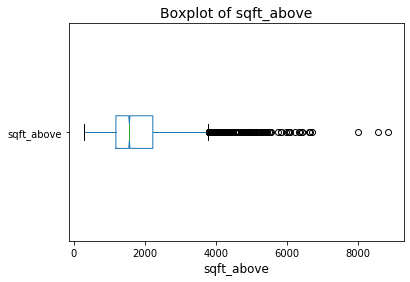

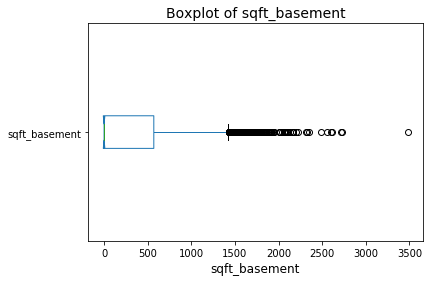

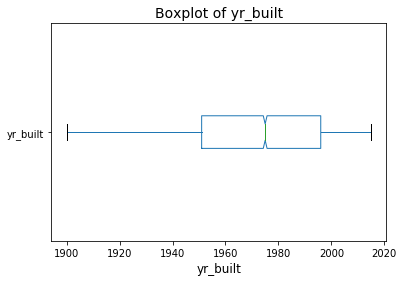

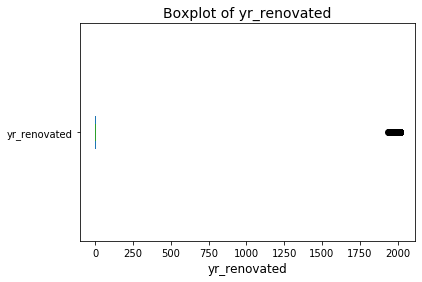

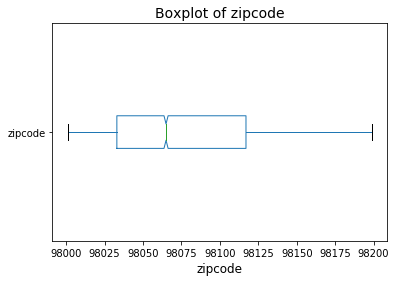

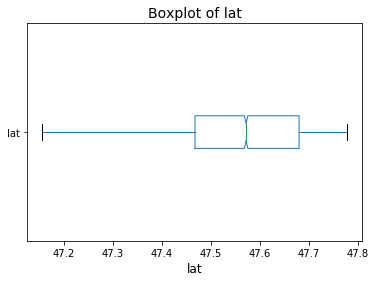

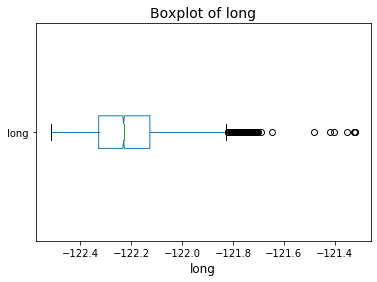

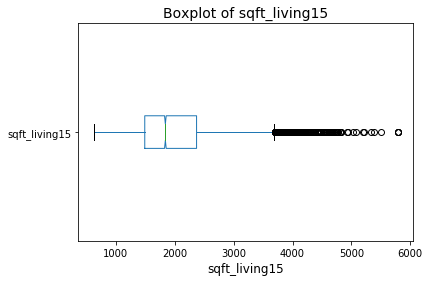

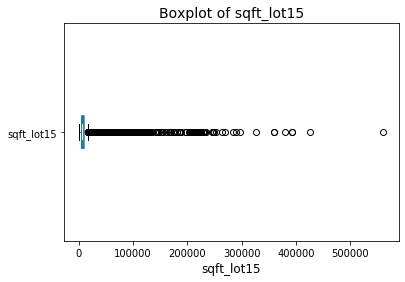

In [8]:
#boxplot of all the columns
graphsuni(train)

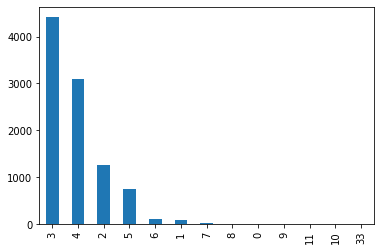

In [9]:
train['bedrooms'].value_counts().plot(kind='bar')

In [10]:
tab=pd.crosstab(train.view,columns="Counts")
tab

col_0,Counts
view,
0,8748
1,160
2,454
3,243
4,156


### BIVARIANT ANALYSIS

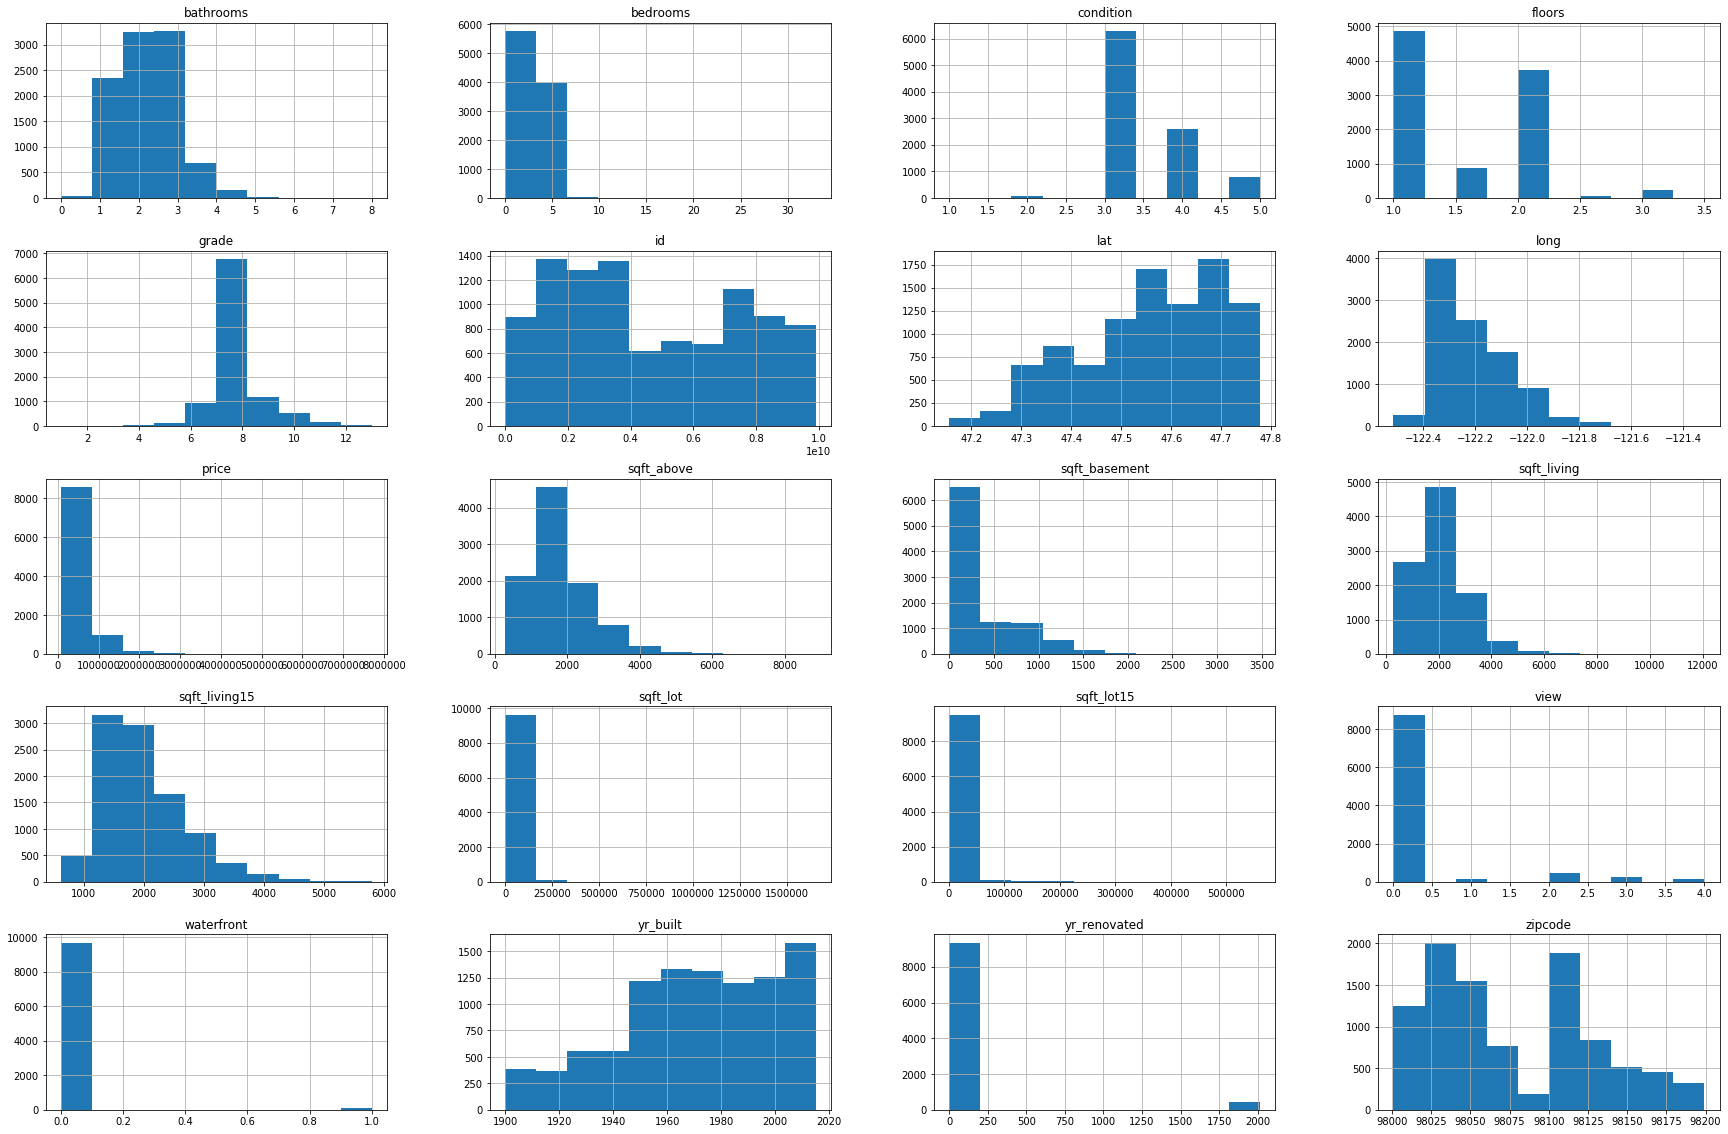

In [11]:
#plotting the frequency of the columns
train.hist(figsize=(30,20))
plt.show()

In [12]:
def graphs(data,columns=None,directory=os.getcwd()):
    cols=data.columns
    if columns==None:
        columns=cols
    print(columns)
    path = os.chdir(directory)
    num_cols = data._get_numeric_data().columns
    num_cols = num_cols.tolist()
    for i in num_cols:
        data.plot.scatter(x=['price'],y=i,s=10)
        plt.ylabel(i,fontsize=12)
        plt.xlabel("price",fontsize=12)
        str1 = "Scatterplot of "+i
        plt.title(str1,fontsize=14)
        plt.savefig(str1,bbox_inches='tight',pad_inches=2,transparent=False,dpi=100)
        plt.show()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


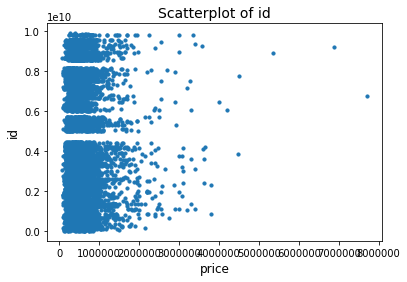

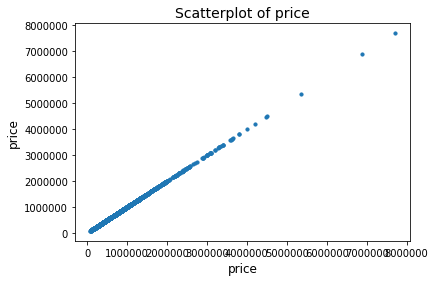

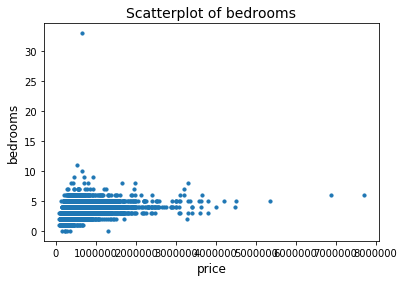

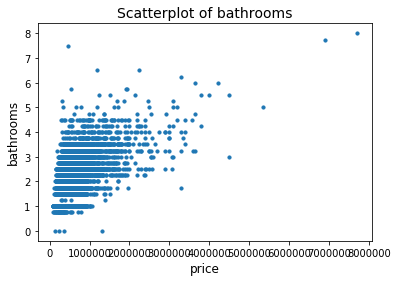

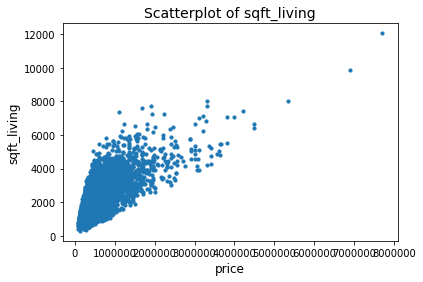

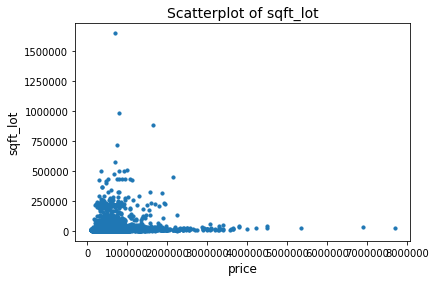

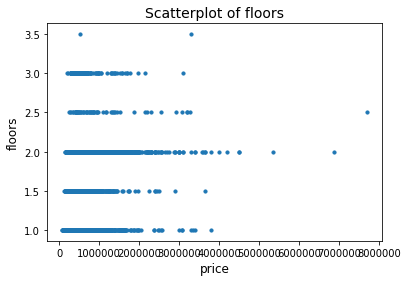

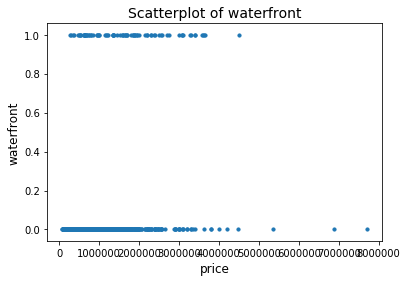

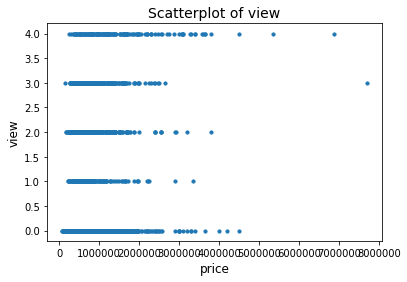

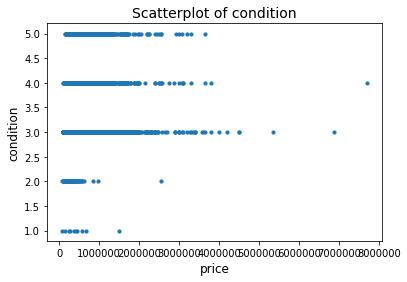

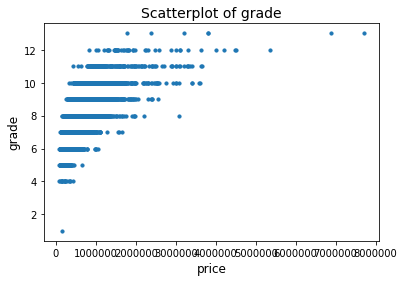

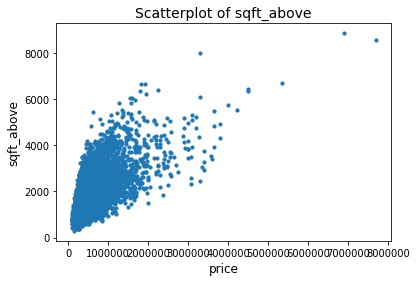

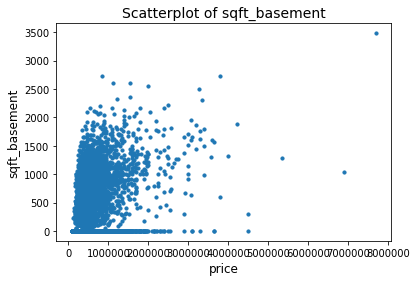

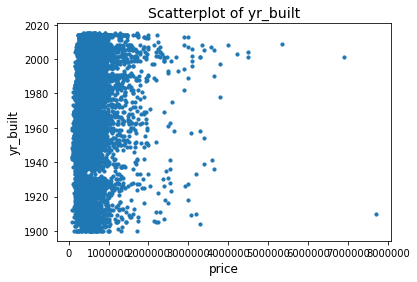

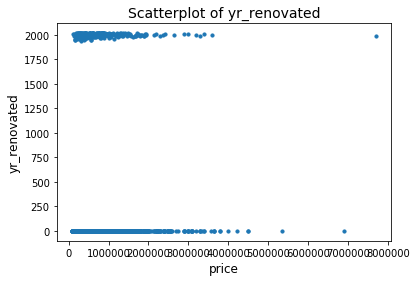

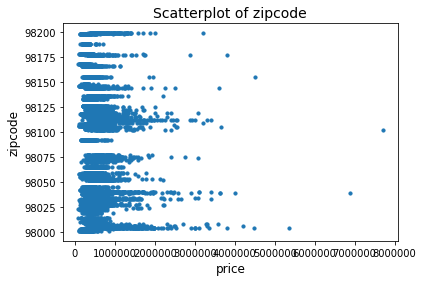

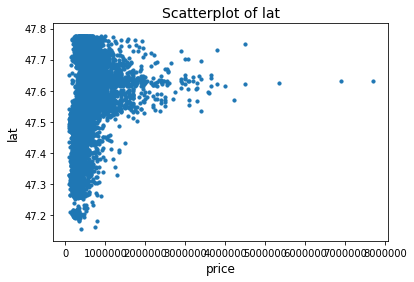

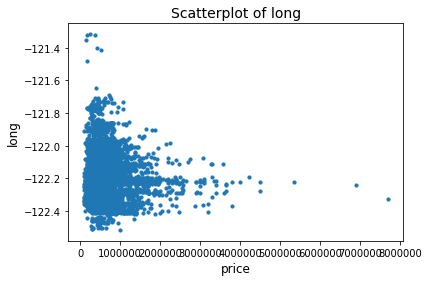

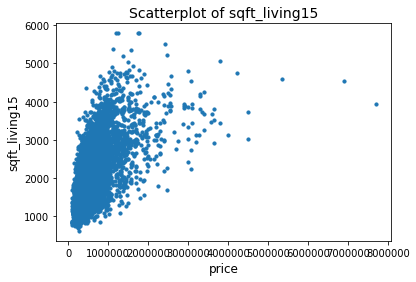

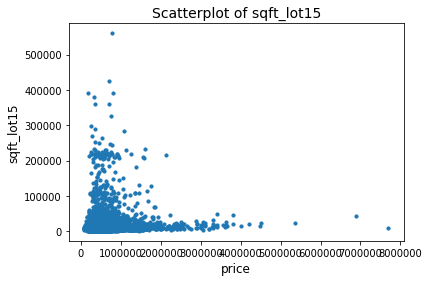

In [13]:
#scatter plot of columns with respect to price
graphs(train)

Looking these scatter plots individually we can observe the following:

Price Vs Squarefeet

Text(0.5, 1.0, 'Price vs squarefeet')

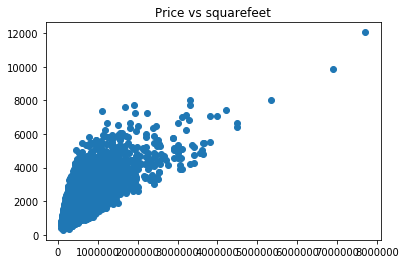

In [14]:
plt.scatter(train.price,train.sqft_living)
plt.title("Price vs squarefeet")

we can see that more the living area , more the price though data is concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear direction.

Price Vs Location

Text(0.5, 1.0, 'Price vs location')

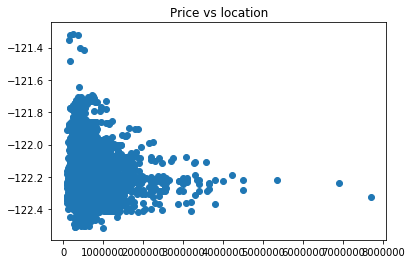

In [15]:
plt.scatter(train.price,train.long)
plt.title("Price vs location")

The location of the houses in terms of longitude and it gives us quite an interesting observation that -122.2 to -122.4 sells houses at much higher amount.

Price Vs Bedrooms

Text(0.5, 1.0, 'Price vs Bedrooms')

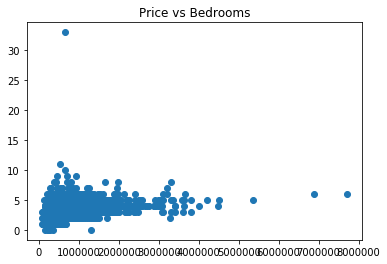

In [16]:
plt.scatter(train.price,train.bedrooms)
plt.title("Price vs Bedrooms")

we can see that 0 to 10 bedrooms, more the price though data is concentrated towards a particular price zone ,As the bedroom increase to 33 we do not see high price,maybe it is an outlier

Price Vs Bathrooms

Text(0.5, 1.0, 'Price vs Bathrooms')

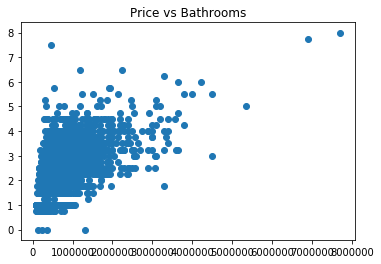

In [17]:
plt.scatter(train.price,train.bathrooms)
plt.title("Price vs Bathrooms")

We can see that as number of bathrooms increase the price also increases but they are few exceptions. 

Price Vs View

Text(0.5, 1.0, 'Price vs View')

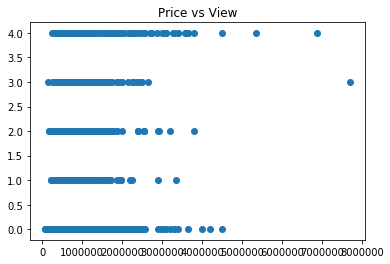

In [18]:
plt.scatter(train.price,train.view)
plt.title("Price vs View")

Better the view better the price but with 3 we have the best price

Price Vs Grade

Text(0.5, 1.0, 'Price vs Grade')

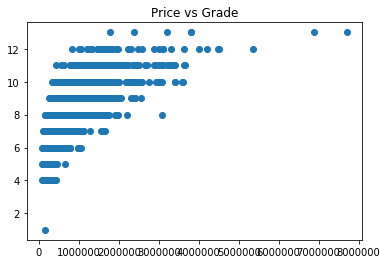

In [19]:
plt.scatter(train.price,train.grade)
plt.title("Price vs Grade")

As the grade increases the price also increases

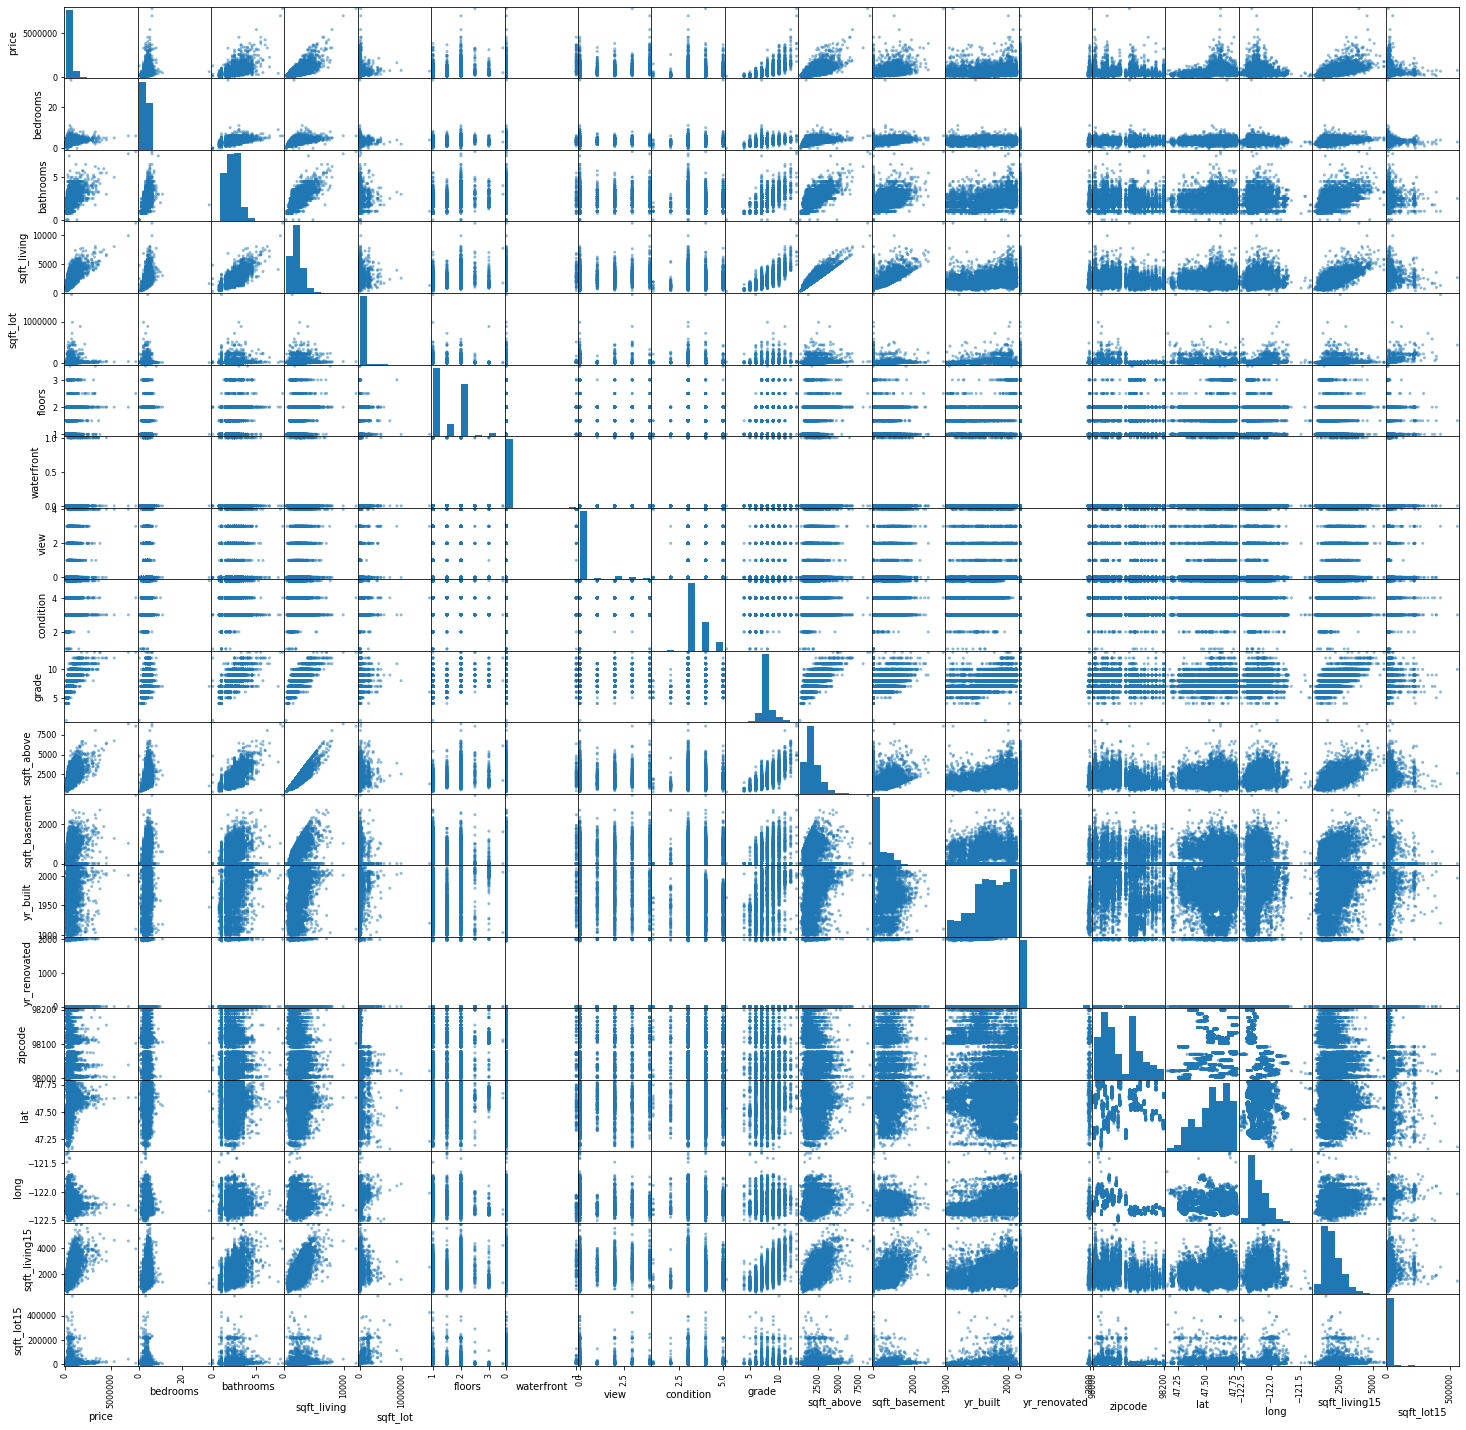

In [20]:
#scatter matrix for all the columns
from pandas.plotting import scatter_matrix
scatter_matrix(train.drop(["id","date"],axis=1),figsize=(25,25))
plt.show()

As we can see the price row we can see that few give the scatter plot in the linear direction, which we can use fo linear regression

Plotting scatter plot for the columns that show linear and that have continuous data.

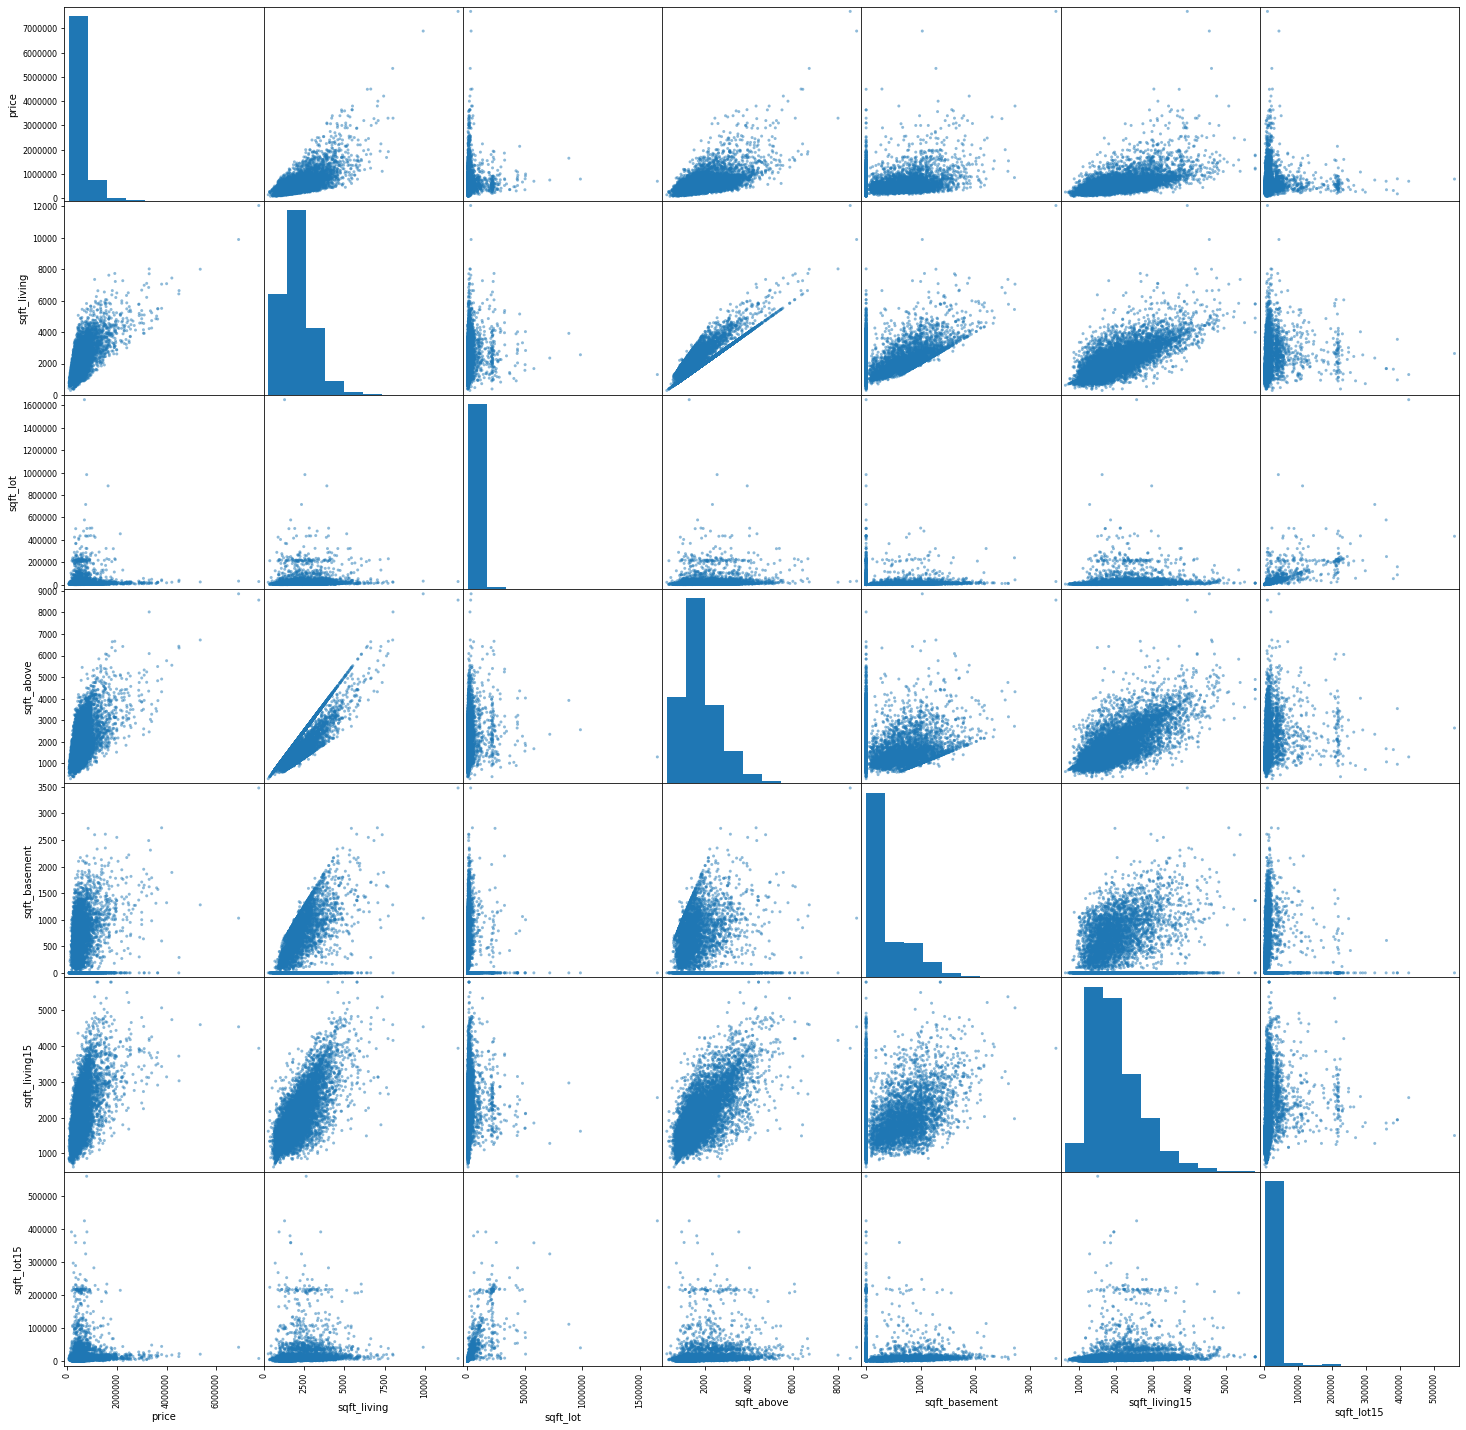

In [21]:
#scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(train.drop(['id', 'date','bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode','lat', 'long'],axis=1),figsize=(25,25))
plt.show()

In [22]:
#getting the correlated variables
corr_features =[]

for i , r in train.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['price', 'bathrooms', 0.5275117130183178],
 ['price', 'sqft_living', 0.7050436600678007],
 ['price', 'grade', 0.6655939026268423],
 ['price', 'sqft_above', 0.6114500383666939],
 ['price', 'sqft_living15', 0.5848293476203167],
 ['bedrooms', 'bathrooms', 0.5060701121538771],
 ['bedrooms', 'sqft_living', 0.5609891838408556],
 ['bathrooms', 'price', 0.5275117130183178],
 ['bathrooms', 'bedrooms', 0.5060701121538771],
 ['bathrooms', 'sqft_living', 0.7589300505576128],
 ['bathrooms', 'floors', 0.5018991969606328],
 ['bathrooms', 'grade', 0.6609250022685055],
 ['bathrooms', 'sqft_above', 0.6929106646389086],
 ['bathrooms', 'sqft_living15', 0.566075738232385],
 ['sqft_living', 'price', 0.7050436600678007],
 ['sqft_living', 'bedrooms', 0.5609891838408556],
 ['sqft_living', 'bathrooms', 0.7589300505576128],
 ['sqft_living', 'grade', 0.7648193674306654],
 ['sqft_living', 'sqft_above', 0.8789890638025107],
 ['sqft_living', 'sqft_living15', 0.7580811014564942],
 ['sqft_lot', 'sqft_lot15', 0.71992

From above we can see that with price we have the following to have more correlation:<br>
 bathrooms- 0.5275117130183178<br>
 sqft_living-  0.7050436600678007<br>
 grade-0.6655939026268423<br>
 sqft_above- 0.6114500383666939<br>
 sqft_living15-0.5848293476203167<br>

Let's see with heat map:

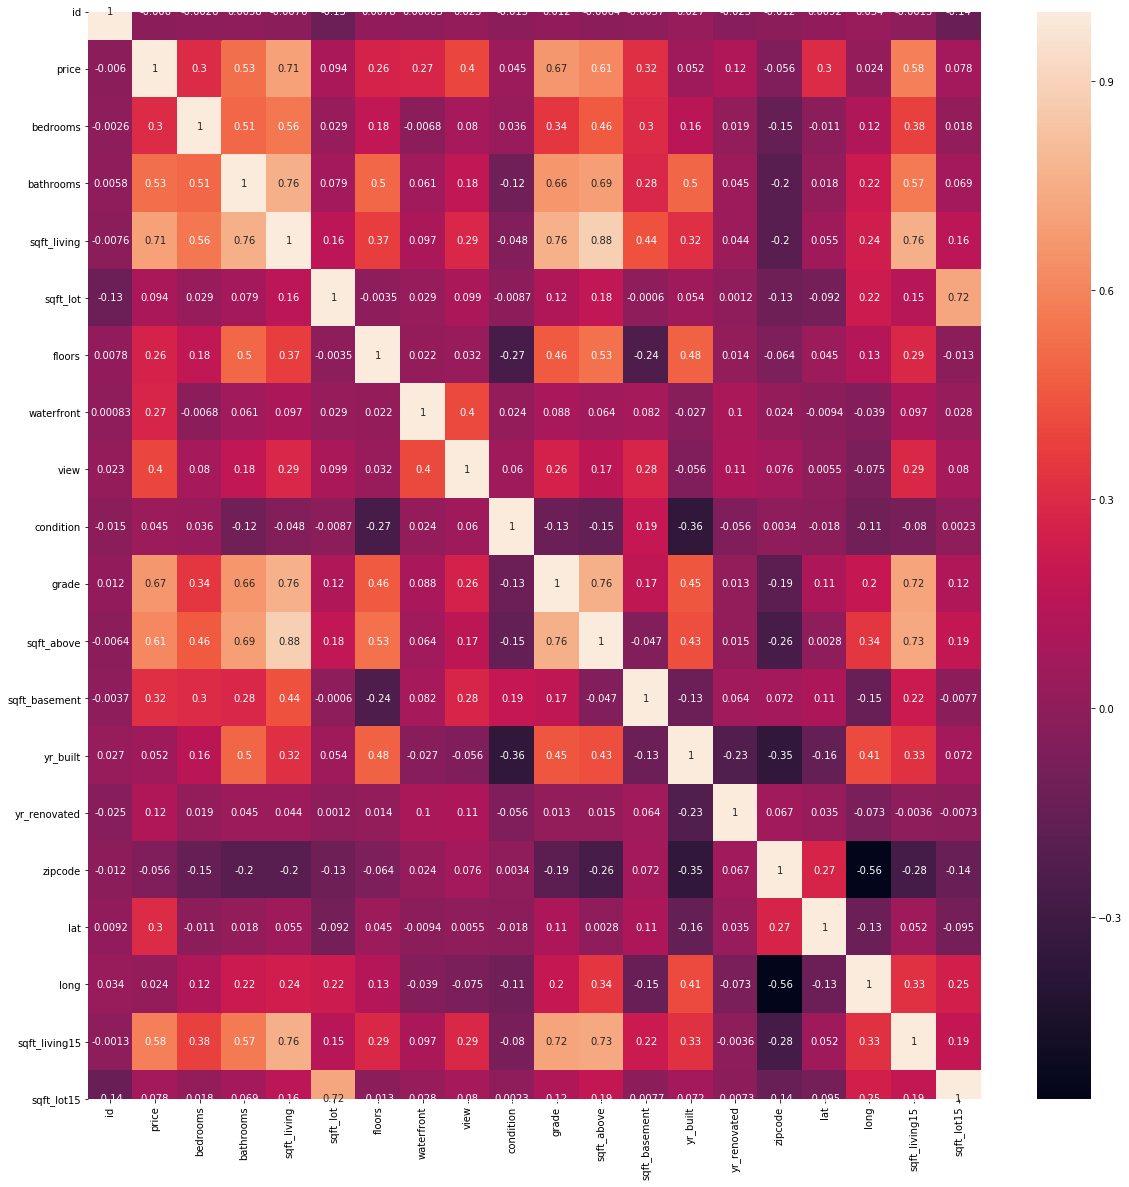

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

By lookig into the correlation and the heat map we can say that these may be the better predictors<br>
**Predictors:**<br>
 bathrooms<br>
 sqft_living<br>
 view<br>
 condition<br>
 zipcode<br>
 grade<br>
 sqft_above<br>
 sqft_living15<br>


### LINEAR REGRESSION

We can use sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15 as predictors as they show linear in scatter plot and are continuous data.

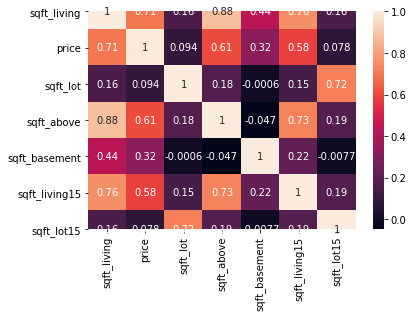

In [24]:
V=train[["sqft_living","price","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
sns.heatmap(V.corr(),annot=True)

In [25]:
#importing libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:
#target 
Y=train.price

### Model 1
We are taking sqft_living.<br>
Considering sqft_living it has good correlation with price.

In [27]:
#performing linear regression and finding RMSE and R2
X1=train[["sqft_living"]]
model1 = LinearRegression()
model1.fit(X1,Y)
CV_score1 = cross_val_score(model1,X1,Y,cv=10,scoring='neg_mean_squared_error')
a1=np.abs(CV_score1.mean())
print("RMSE:",np.sqrt(a1))
CV_score2 = cross_val_score(model1,X1,Y,cv=10,scoring="r2")
print("R2:",CV_score2.mean())

RMSE: 269729.4196380303
R2: 0.48970786331171967


sqft_living
1.425606471548795


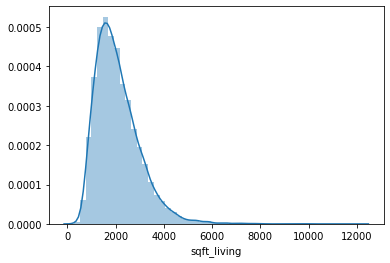

In [28]:
#Checking skewness
from scipy.stats  import skew
for i in X1:
    print(i)
    print(skew(X1[i]))
    
    plt.figure()
    sns.distplot(X1[i])
    plt.show()

### Model 2
We are taking sqft_living,sqft_lot.<br>
Considering sqft_lot it has highest correlation as we see heatmap

In [29]:
#performing linear regression and finding RMSE and R2
X2=train[["sqft_living","sqft_lot"]]
model2 = LinearRegression()
model2.fit(X2,Y)
CV_score3 = cross_val_score(model2,X2,Y,cv=10,scoring='neg_mean_squared_error')
a2=np.abs(CV_score3.mean())
print("RMSE:",np.sqrt(a2))
CV_score4 = cross_val_score(model2,X2,Y,cv=10,scoring="r2")
print("R2:",CV_score4.mean())

RMSE: 269683.9484240291
R2: 0.48990630289854853


sqft_living
1.425606471548795


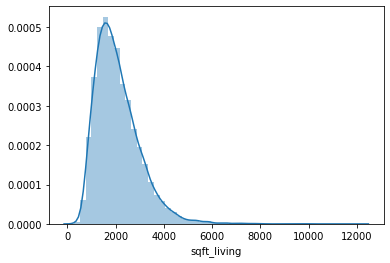

sqft_lot
13.601789119382394


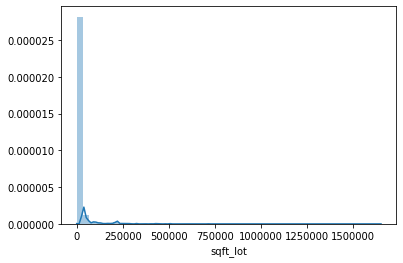

In [30]:
#Checking skewness
from scipy.stats  import skew
for i in X2:
    print(i)
    print(skew(X2[i]))
    
    plt.figure()
    sns.distplot(X2[i])
    plt.show()

### Model 3
We are taking sqft_living,sqft_lot,sqft_above,sqft_basement.<br>
Consider sqft_basement we do not have good correlation but with maybe we can see change


In [31]:
#performing linear regression and finding RMSE and R2
X3=train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
model3 = LinearRegression()
model3.fit(X3,Y)
CV_score5 = cross_val_score(model3,X3,Y,cv=10,scoring='neg_mean_squared_error')
a3=np.abs(CV_score5.mean())
print("RMSE:",np.sqrt(a3))
CV_score6 = cross_val_score(model3,X3,Y,cv=10,scoring="r2")
print("R2:",CV_score6.mean())

RMSE: 269753.74235470645
R2: 0.4896668323702717


sqft_living
1.425606471548795


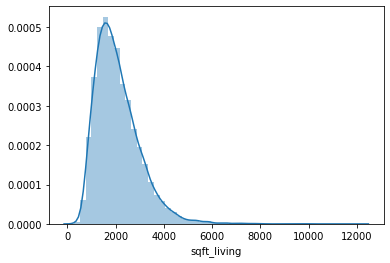

sqft_lot
13.601789119382394


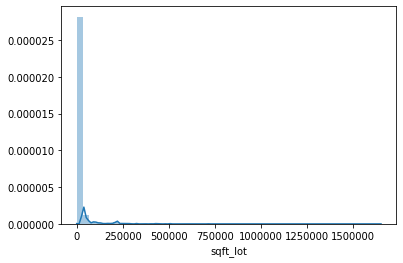

sqft_above
1.452525059541931


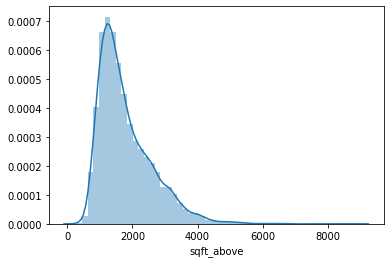

sqft_basement
1.4698571123521746


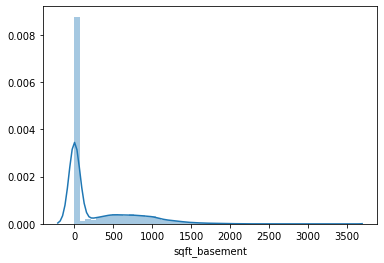

In [32]:
#Checking skewness
from scipy.stats  import skew
for i in X3:
    print(i)
    print(skew(X3[i]))
    
    plt.figure()
    sns.distplot(X3[i])
    plt.show()

### Model 4
We are taking sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15<br>
Considering all to see if there is any change

In [33]:
#performing linear regression and finding RMSE and R2
X4=train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
model4 = LinearRegression()
model4.fit(X4,Y)
CV_score7 = cross_val_score(model4,X4,Y,cv=10,scoring='neg_mean_squared_error')
a4=np.abs(CV_score7.mean())
print("RMSE:",np.sqrt(a4))
CV_score8 = cross_val_score(model4,X4,Y,cv=10,scoring="r2")
print("R2:",CV_score8.mean())

RMSE: 267954.8474747896
R2: 0.4972788738327651


sqft_living
1.425606471548795


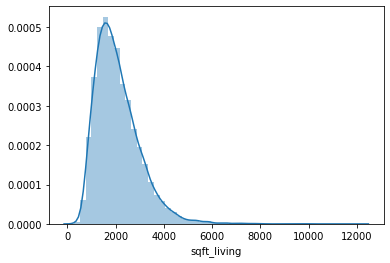

sqft_lot
13.601789119382394


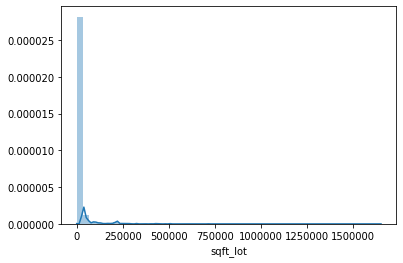

sqft_above
1.452525059541931


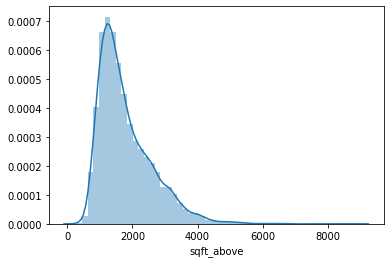

sqft_basement
1.4698571123521746


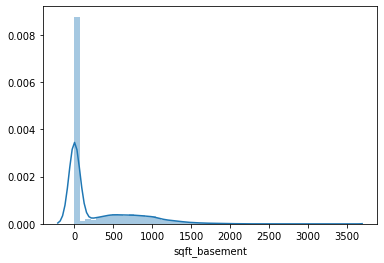

sqft_living15
1.1026639248966132


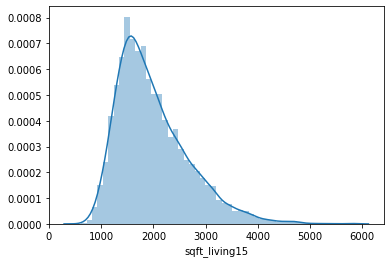

sqft_lot15
7.754311515565764


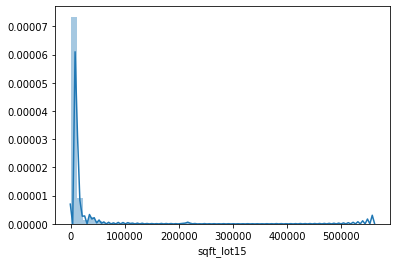

In [34]:
#Checking skewness
from scipy.stats  import skew
for i in X4:
    print(i)
    print(skew(X4[i]))
    
    plt.figure()
    sns.distplot(X4[i])
    plt.show()

### Model 5
We are taking sqft_living,sqft_lot,sqft_living15,sqft_lot15<br>
Considering all with best correlation to see if there is any change

In [35]:
#performing linear regression and finding RMSE and R2
X5=train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
model5 = LinearRegression()
model5.fit(X5,Y)
CV_score9 = cross_val_score(model5,X5,Y,cv=10,scoring='neg_mean_squared_error')
a5=np.abs(CV_score9.mean())
print("RMSE:",np.sqrt(a5))
CV_score10= cross_val_score(model5,X5,Y,cv=10,scoring="r2")
print("R2:",CV_score10.mean())

RMSE: 268127.46666367096
R2: 0.49651529570938974


sqft_living
1.425606471548795


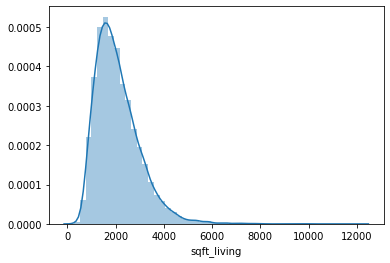

sqft_lot
13.601789119382394


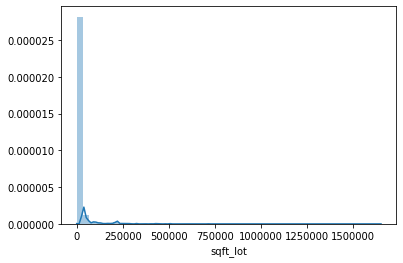

sqft_living15
1.1026639248966132


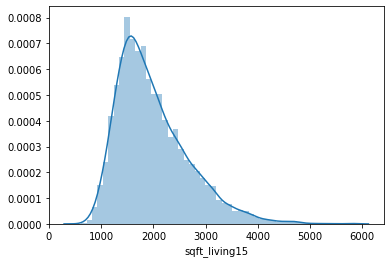

sqft_lot15
7.754311515565764


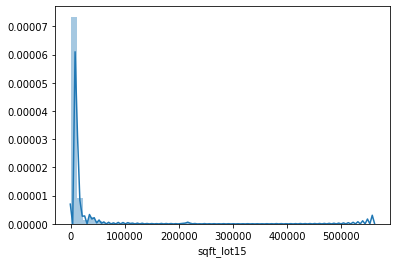

In [36]:
#Checking skewness
from scipy.stats  import skew
for i in X5:
    print(i)
    print(skew(X5[i]))
    
    plt.figure()
    sns.distplot(X5[i])
    plt.show()

### Model 6
We are taking sqft_lot,sqft_basement,sqft_lot15<br>
Considering all which are most positively skewed to see if there is any change

In [37]:
#performing linear regression and finding RMSE and R2
X6=train[["sqft_lot","sqft_basement","sqft_lot15"]]
model6 = LinearRegression()
model6.fit(X6,Y)
CV_score11 = cross_val_score(model6,X6,Y,cv=10,scoring='neg_mean_squared_error')
a6=np.abs(CV_score11.mean())
print("RMSE:",np.sqrt(a6))
CV_score12= cross_val_score(model6,X6,Y,cv=10,scoring="r2")
print("R2:",CV_score12.mean())

RMSE: 358316.05859811633
R2: 0.103943191221425


sqft_lot
13.601789119382394


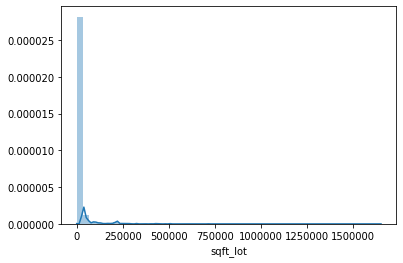

sqft_basement
1.4698571123521746


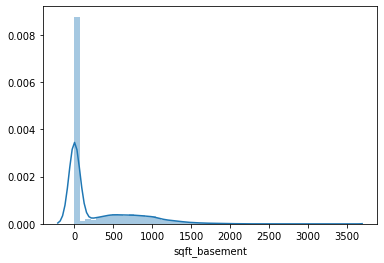

sqft_lot15
7.754311515565764


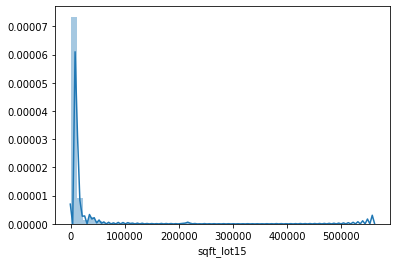

In [38]:
#Checking skewness
from scipy.stats  import skew
for i in X6:
    print(i)
    print(skew(X6[i]))
    
    plt.figure()
    sns.distplot(X6[i])
    plt.show()

## FEATURE TRANSFORMATION

As our data has outliers which cause data to be positively skewed for few parameters.This can be reduced using feature transformation.

#### Taking square root

In [39]:
S=np.sqrt(train[["sqft_lot","sqft_lot15","sqft_basement"]])
models = LinearRegression()
models.fit(S,Y)
CV_score13 = cross_val_score(models,S,Y,cv=10,scoring='neg_mean_squared_error')
a7=np.abs(CV_score13.mean())
print("RMSE:",np.sqrt(a7))
CV_score14 = cross_val_score(models,S,Y,cv=10,scoring="r2")
print("R2:",CV_score14.mean())

RMSE: 362555.1166594581
R2: 0.08369400098338119


We can see a slight change in RMSE and R2 but RMSE increased and R2 decreased so it is not suitable.<br>
RMSE from 358316.0585 to 362555.116<br>
R2 from 0.103 to 0.083

#### Taking log

In [40]:
S2=np.log(train[["sqft_lot15","sqft_lot","sqft_basement"]]+1) 
models2 = LinearRegression()
models2.fit(S2,Y)
CV_score15 = cross_val_score(models2,S2,Y,cv=10,scoring='neg_mean_squared_error')
a8=np.abs(CV_score15.mean())
print("RMSE:",np.sqrt(a8))
CV_score16 = cross_val_score(models2,S2,Y,cv=10,scoring="r2")
print("R2:",CV_score16.mean())

RMSE: 365780.57299123245
R2: 0.06790496500426475


While we are taking log we are getting error for sqft_basement so we will take log+1<br>
We can see a very small change<br>
RMSE from 358316.0585 to 365780.572<br>
R2 from 0.103 to 0.067

**Squaring**

In [41]:
S3=np.square(train[["sqft_lot15","sqft_lot","sqft_basement"]]+1) 
models3= LinearRegression()
models3.fit(S3,Y)
CV_score17 = cross_val_score(models3,S3,Y,cv=10,scoring='neg_mean_squared_error')
a10=np.abs(CV_score17.mean())
print("RMSE:",np.sqrt(a10))
CV_score18 = cross_val_score(models3,S3,Y,cv=10,scoring="r2")
print("R2:",CV_score18.mean())

RMSE: 352323.0221264352
R2: 0.12998158477098248


When we are squaring we can see that R2 increses and RMSE decreases.<br>
It may be suitable but the change is small.<br>
RMSE from 358316.0585 to 352323.022<br>
R2 from 0.103 to 0.129

### NEW FEATURE

We are creating new column for age of the building by subtracting year in date and the yr_built

For getting the year from date convert it into datetime datatype

In [46]:
train["date"] = pd.to_datetime(train["date"])

In [48]:
# the year of datetime
train["year"] = train["date"].dt.year

In [49]:
#see the train
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create a new column age which is difference of year and year built 

In [50]:
train["age"]= train['year']-train['yr_built']
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,49
1,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,0,0,0,0,0,0,0,0,0,13
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,72
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,0,0,0,0,0,0,0,0,87
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,0,0,0,0,0,0,0,0,37


Now let's try linear regression on the new column 

In [51]:
Xn= train[['age']]
modeln = LinearRegression()
modeln.fit(Xn,Y)
CV_scoren= cross_val_score(modeln,Xn,Y,cv=10,scoring='neg_mean_squared_error')
an=np.abs(CV_scoren.mean())
print("RMSE:",np.sqrt(an))
CV_scoren2 = cross_val_score(modeln,Xn,Y,cv=10,scoring="r2")
print("R2:",CV_scoren2.mean())

RMSE: 379431.1183192284
R2: -0.0008596735670498012


We are getting negative r2

Install the mlxtend to do forward selection and backward elimination

In [43]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
#import libraries
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

### FORWARD SELECTION

In forward selection train model using each feature individually and check the performance and for the variable with best performance, we repeat the process and add one variable at a time.<br>
It repeats until there is no significant improvement in the model's performance.

### Forward selection for Model 1

In [45]:
Xf1 = train[["sqft_living"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=1, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf1,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 09:18:26] Features: 1/1 -- score: -72615267183.89131

In [53]:
#Doing square root for MSE
RMSE=60917540375.15753**0.5
RMSE

246814.78961998515

In [47]:
Xf1 = train[["sqft_living"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=1, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf1,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 09:18:27] Features: 1/1 -- score: 0.49521155565797415

The RMSE decreased and R2 increased slightly

### Forward selection for Model 2

In [55]:
Xf2=train[["sqft_living","sqft_lot"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=2, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf2,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:28:32] Features: 1/2 -- score: -72615267183.89131[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:28:32] Features: 2/2 -- score: -72586910588.15427

In [56]:
#Doing square root for MSE
RMSE2=60927559780.7901**0.5
RMSE2

246835.086202894

In [57]:
Xf2=train[["sqft_living","sqft_lot"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=2, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf2,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:28:34] Features: 1/2 -- score: 0.49521155565797415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:28:34] Features: 2/2 -- score: 0.49545369887998386

The RMSE decreased and R2 increased slightly

### Forward selection for Model 3

In [58]:
Xf3=train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf3,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:28:37] Features: 1/4 -- score: -72615267183.89131[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:28:37] Features: 2/4 -- score: -72586910588.15427[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:28:38] Features: 3/4 -- score: -72636039092.83551[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [59]:
#Doing square root for MSE
RMSE3=61012145433.85343**0.5
RMSE3

247006.36719293986

In [60]:
Xf3=train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=4, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf3,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:28:46] Features: 1/4 -- score: 0.49521155565797415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:28:46] Features: 2/4 -- score: 0.49545369887998386[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:28:46] Features: 3/4 -- score: 0.49509707123835456[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

The RMSE decreased and R2 increased slightly

### Forward selection for Model 4

In [61]:
Xf4=train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=6, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf4,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-11-08 18:28:51] Features: 1/6 -- score: -72615267183.89131[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-11-08 18:28:51] Features: 2/6 -- score: -72064550100.93881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:28:51] Features: 3/6 -- score: -71791577828.36003[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [62]:
#Doing square root for MSE
RMSE4=59317075301.54686**0.5
RMSE4

243550.97064381998

In [63]:
Xf4=train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=6, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf4,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-11-08 18:29:00] Features: 1/6 -- score: 0.49521155565797415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-11-08 18:29:00] Features: 2/6 -- score: 0.4992330546433205[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:29:00] Features: 3/6 -- score: 0.5011177086791325[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

The RMSE decreased and R2 increased slightly

### Forward selection for Model 5

In [64]:
Xf5=train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf5,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:29:06] Features: 1/3 -- score: -72615267183.89131[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:29:06] Features: 2/3 -- score: -72064550100.93881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:29:06] Features: 3/3 -- score: -71791577828.36003

In [66]:
#Doing square root for MSE
RMSE5=59468046777.11708**0.5
RMSE5

243860.7118359107

In [67]:
Xf5=train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=3, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf5,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 18:29:13] Features: 1/3 -- score: 0.49521155565797415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:29:13] Features: 2/3 -- score: 0.4992330546433205[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:29:13] Features: 3/3 -- score: 0.5011177086791325

The RMSE decreased and R2 increased slightly

### Forward selection for Model 6

In [68]:
Xf6=train[["sqft_lot","sqft_basement","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error')
F = fs.fit(Xf6,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:29:16] Features: 1/3 -- score: -129543797726.31404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:29:16] Features: 2/3 -- score: -128329539977.60916[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:29:16] Features: 3/3 -- score: -128375147724.5915

In [69]:
#Doing square root for MSE
RMSE6=101945439912.48367**0.5
RMSE6

319288.9598975882

In [70]:
Xf6=train[["sqft_lot","sqft_basement","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
fs = sfs(LR, k_features=3, forward=True, verbose=2, scoring='r2')
F = fs.fit(Xf6,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 18:29:24] Features: 1/3 -- score: 0.09988674644666048[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 18:29:24] Features: 2/3 -- score: 0.10829134733413334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:29:24] Features: 3/3 -- score: 0.10794729526630195

The RMSE decreased and R2 increased slightly

### BACKWARD ELIMINATION

In backward elimination train model using all feature and check the performance, drop one variable at a time and check performance.

### Backward Elimination for Model 1

As in Model 1 we have only one variable backward and forward are similar

In [73]:
Xb1 = train[["sqft_living"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=1, forward=True, verbose=2, scoring='neg_mean_squared_error')
B=bs.fit(Xb1,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:45:58] Features: 1/1 -- score: -72615267183.89131

In [77]:
#Doing square root for MSE
RMSED=60917540375.15753**0.5
RMSED

246814.78961998515

In [74]:
Xb1 = train[["sqft_living"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=1,forward=True, verbose=2, scoring='r2')
B=bs.fit(Xb1,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-11-08 18:46:04] Features: 1/1 -- score: 0.49521155565797415

The RMSE decreased and R2 increased slightly

### Backward Elimination for Model 2

In [65]:
Xb2=train[["sqft_living","sqft_lot"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=1, forward=False, verbose=2, scoring='neg_mean_squared_error')
B= bs.fit(Xb2,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 09:18:28] Features: 1/1 -- score: -72615267183.89131

In [78]:
#Doing square root for MSE
RMSED1=60917540375.15753**0.5
RMSED1

246814.78961998515

In [67]:
Xb2=train[["sqft_living","sqft_lot"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=1, forward=False, verbose=2, scoring='r2')
B= bs.fit(Xb2,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-11-08 09:18:28] Features: 1/1 -- score: 0.49521155565797415

The RMSE decreased and R2 increased slightly

### Backward Elimination for Model 3

In [68]:
Xb3=train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=3, forward=False, verbose=2, scoring='neg_mean_squared_error')
B= bs.fit(Xb3,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 3/3 -- score: -72636039092.83551

In [79]:
#Doing square root for MSE
RMSED2=60997228466.97467**0.5
RMSED2

246976.1698362307

In [70]:
Xb3=train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=3, forward=False, verbose=2, scoring='r2')
B= bs.fit(Xb3,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 3/3 -- score: 0.49509707123835456

The RMSE decreased and R2 increased slightly

### Backward Elimination for Model 4

In [71]:
Xb4=train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=5, forward=False, verbose=2, scoring='neg_mean_squared_error')
B = bs.fit(Xb4,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 5/5 -- score: -71687407574.75865

In [80]:
#Doing square root for MSE
RMSED3=59317075301.54686**0.5
RMSED3

243550.97064381998

In [73]:
Xb4=train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=5, forward=False, verbose=2, scoring='r2')
B = bs.fit(Xb4,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 5/5 -- score: 0.501815826137371

The RMSE decreased and R2 increased slightly

### Backward Elimination for Model 5

In [74]:
Xb5=train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=3, forward=False, verbose=2, scoring='neg_mean_squared_error')
B = bs.fit(Xb5,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 3/3 -- score: -71791577828.36003

In [81]:
#Doing square root for MSE
RMSED4=59468046777.11708**0.5
RMSED4

243860.7118359107

In [76]:
Xb5=train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=3, forward=False, verbose=2, scoring='r2')
B = bs.fit(Xb5,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 3/3 -- score: 0.5011177086791325

The RMSE decreased and R2 increased slightly

### Backward Elimination for Model 6

In [77]:
Xb6=train[["sqft_lot","sqft_basement","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=2, forward=False, verbose=2, scoring='neg_mean_squared_error')
B = bs.fit(Xb6,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 2/2 -- score: -128329539977.60916

In [82]:
#Doing square root for MSE
RMSED5=101934421927.76338**0.5
RMSED5

319271.70549198904

In [79]:
Xb6=train[["sqft_lot","sqft_basement","sqft_lot15"]]
Y = train['price']
LR = LinearRegression()
bs = sfs(LR, k_features=2, forward=False, verbose=2, scoring='r2')
B = bs.fit(Xb6,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-11-08 09:18:29] Features: 2/2 -- score: 0.10829134733413334

The RMSE decreased and R2 increased slightly

## DECISION TREE

### Decision Tree for Model 1

In [86]:
#import library
from sklearn.tree import  DecisionTreeRegressor

Did Hypertuning to get better model where Max_dept is number of predictors-1 and Min_samples_leaf as 1

In [87]:
Xd1 = train[["sqft_living"]]
dt = DecisionTreeRegressor(max_depth=1,min_samples_leaf=1)
dt.fit(Xd1,Y)
cv_score1 = cross_val_score(dt,Xd1,Y,cv=10,scoring='neg_mean_squared_error')
cv_score2 = cross_val_score(dt,Xd1,Y,cv=10,scoring="r2")
d1=np.abs(cv_score1.mean())
print("RMSE:",np.sqrt(d1))
print("R2",cv_score2.mean())

RMSE: 320527.0769070144
R2 0.28439512771220504


Highest RMSE and Least R2 for the given model

### Decision Tree for Model 2

In [88]:
Xd2 =train[["sqft_living","sqft_lot"]]
dt = DecisionTreeRegressor(max_depth=1,min_samples_leaf=1)
dt.fit(Xd2,Y)
cv_score3 = cross_val_score(dt,Xd2,Y,cv=10,scoring='neg_mean_squared_error')
cv_score4 = cross_val_score(dt,Xd2,Y,cv=10,scoring="r2")
d2=np.abs(cv_score3.mean())
print("RMSE:",np.sqrt(d2))
print("R2",cv_score4.mean())

RMSE: 320527.0769070144
R2 0.28439512771220504


Highest RMSE and Least R2 for the given model

### Decision Tree for Model 3

In [182]:
Xd3 =train[["sqft_living","sqft_lot","sqft_above","sqft_basement"]]
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf=1)
dt.fit(Xd3,Y)
cv_score5 = cross_val_score(dt,Xd3,Y,cv=10,scoring='neg_mean_squared_error')
cv_score6 = cross_val_score(dt,Xd3,Y,cv=10,scoring="r2")
d3=np.abs(cv_score5.mean())
print("RMSE:",np.sqrt(d3))
print("R2",cv_score6.mean())

RMSE: 265736.18907714775
R2 0.503703253609989


RMSE Decreased and R2 increased

### Decision Tree for Model 4

In [184]:
Xd4 =train[["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
dt = DecisionTreeRegressor(max_depth=5,min_samples_leaf=1)
dt.fit(Xd4,Y)
cv_score7 = cross_val_score(dt,Xd4,Y,cv=10,scoring='neg_mean_squared_error')
cv_score8 = cross_val_score(dt,Xd4,Y,cv=10,scoring="r2")
d4=np.abs(cv_score7.mean())
print("RMSE:",np.sqrt(d4))
print("R2",cv_score8.mean())

RMSE: 254419.443402345
R2 0.5444376260745296


RMSE Decreased and R2 increased

### Decision Tree for Model 5

In [185]:
Xd5 =train[["sqft_living","sqft_lot","sqft_living15","sqft_lot15"]]
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf=1)
dt.fit(Xd5,Y)
cv_score9= cross_val_score(dt,Xd5,Y,cv=10,scoring='neg_mean_squared_error')
cv_score10 = cross_val_score(dt,Xd5,Y,cv=10,scoring="r2")
d5=np.abs(cv_score9.mean())
print("RMSE:",np.sqrt(d5))
print("R2",cv_score10.mean())

RMSE: 264483.79630586045
R2 0.5085394899910931


RMSE Decreased and R2 increased

### Decision Tree for Model 6

In [92]:
Xd6 =train[["sqft_lot","sqft_basement","sqft_lot15"]]
dt = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1)
dt.fit(Xd6,Y)
cv_score7 = cross_val_score(dt,Xd6,Y,cv=10,scoring='neg_mean_squared_error')
cv_score8 = cross_val_score(dt,Xd6,Y,cv=10,scoring="r2")
d6=np.abs(cv_score7.mean())
print("RMSE:",np.sqrt(d6))
print("R2",cv_score8.mean())

RMSE: 357592.3809879918
R2 0.10632228072947947


RMSE and R2 does not have change

### Decision Tree for Model 7

Model 7 is Feature Transformation (Squareroot)

In [93]:
Xd7=np.sqrt(train[["sqft_lot","sqft_lot15","sqft_basement"]])
dt = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1)
dt.fit(Xd7,Y)
cv_score9 = cross_val_score(dt,Xd7,Y,cv=10,scoring='neg_mean_squared_error')
cv_score10 = cross_val_score(dt,Xd7,Y,cv=10,scoring="r2")
d7=np.abs(cv_score9.mean())
print("RMSE:",np.sqrt(d7))
print("R2",cv_score10.mean())

RMSE: 357592.3809879918
R2 0.10632228072947947


RMSE and R2 does not have change and similar with other feature transformations.

### Decision Tree for Model 8

Model 8 is Feature Transformation (Log +1)

In [94]:
Xd8=np.log(train[["sqft_lot15","sqft_lot","sqft_basement"]]+1) 
dt = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1)
dt.fit(Xd8,Y)
cv_score11 = cross_val_score(dt,Xd8,Y,cv=10,scoring='neg_mean_squared_error')
cv_score12 = cross_val_score(dt,Xd8,Y,cv=10,scoring="r2")
d8=np.abs(cv_score11.mean())
print("RMSE:",np.sqrt(d8))
print("R2",cv_score12.mean())

RMSE: 357592.3809879918
R2 0.10632228072947947


RMSE and R2 does not have change and similar with other feature transformations.

### Decision Tree for Model 9

Model 9 is Feature Transformation (Squaring)

In [99]:
Xd9=np.square(train[["sqft_lot15","sqft_lot","sqft_basement"]]) 
dt = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1)
dt.fit(Xd9,Y)
cv_score13 = cross_val_score(dt,Xd9,Y,cv=10,scoring='neg_mean_squared_error')
cv_score14 = cross_val_score(dt,Xd9,Y,cv=10,scoring="r2")
d9=np.abs(cv_score13.mean())
print("RMSE:",np.sqrt(d9))
print("R2",cv_score14.mean())

RMSE: 357592.3809879918
R2 0.10632228072947947


RMSE and R2 does not have change and similar with other feature transformations.

### Decision Tree for Model 10

Model 10 is the New Feature(Column age)

In [100]:
Xd10=train[["age"]]
dt = DecisionTreeRegressor(max_depth=1,min_samples_leaf=1)
dt.fit(Xd10,Y)
cv_score15 = cross_val_score(dt,Xd10,Y,cv=10,scoring='neg_mean_squared_error')
cv_score16 = cross_val_score(dt,Xd10,Y,cv=10,scoring="r2")
d10=np.abs(cv_score15.mean())
print("RMSE:",np.sqrt(d10))
print("R2",cv_score16.mean())

RMSE: 376267.665869758
R2 0.015842277028506546


RMSE and R2 does not have change and similar with other feature transformations.

### Decision Tree for Model 11

Model 11 for different features ["age","long","lat","sqft_living","sqft_lot15","sqft_lot","sqft_basement"]

In [101]:
Xd11=train[["age","long","lat","sqft_living","sqft_lot15","sqft_lot","sqft_basement"]]
dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)
dt.fit(Xd11,Y)
cv_score17 = cross_val_score(dt,Xd11,Y,cv=10,scoring='neg_mean_squared_error')
cv_score18 = cross_val_score(dt,Xd11,Y,cv=10,scoring="r2")
d11=np.abs(cv_score17.mean())
print("RMSE:",np.sqrt(d11))
print("R2",cv_score18.mean())

RMSE: 206766.17303594234
R2 0.6970057522635675


Better model than other

### Decision Tree for Model 12

Model 12 for different features ["grade","lat","sqft_living","sqft_above","sqft_lot","bathrooms"]

In [102]:
Xd12=train[["grade","lat","sqft_living","sqft_above","sqft_lot","bathrooms"]]
dt = DecisionTreeRegressor(max_depth=5,min_samples_leaf=1)
dt.fit(Xd12,Y)
cv_score19 = cross_val_score(dt,Xd12,Y,cv=10,scoring='neg_mean_squared_error')
cv_score20 = cross_val_score(dt,Xd12,Y,cv=10,scoring="r2")
d12=np.abs(cv_score19.mean())
print("RMSE:",np.sqrt(d12))
print("R2",cv_score20.mean())

RMSE: 222561.2712916886
R2 0.6464868003133806


### Decision Tree for Model 13

Model 13 for different features ["sqft_living","grade","lat","bathrooms",'long','sqft_lot15']

In [110]:
Xd13=(train[["sqft_living","grade","lat","bathrooms",'long','sqft_lot15']])
dt = DecisionTreeRegressor(max_depth=5,min_samples_leaf=1)
dt.fit(Xd10,Y)
cv_score21 = cross_val_score(dt,Xd13,Y,cv=10,scoring='neg_mean_squared_error')
cv_score22 = cross_val_score(dt,Xd13,Y,cv=10,scoring="r2")
d13=np.abs(cv_score21.mean())
print("RMSE:",np.sqrt(d13))
print("R2",cv_score22.mean())

RMSE: 215839.48355105054
R2 0.680537691676169


### Decision Tree for Model 14

Model 14 for different features ["sqft_living","grade","lat","bathrooms",'long','bedrooms','view']

In [111]:
Xd14=(train[["sqft_living","grade","lat","bathrooms",'long','bedrooms','view']])
dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)
dt.fit(Xd10,Y)
cv_score23 = cross_val_score(dt,Xd14,Y,cv=10,scoring='neg_mean_squared_error')
cv_score24 = cross_val_score(dt,Xd14,Y,cv=10,scoring="r2")
d14=np.abs(cv_score23.mean())
print("RMSE:",np.sqrt(d14))
print("R2",cv_score24.mean())

RMSE: 194626.01463591866
R2 0.739169115205602


Model 14 is the best So lets use it for Test data

## TESTING

In [112]:
#Read the test data
test = pd.read_csv(r"C:\Users\nirup\Downloads\kc_house_test_data.csv")

In [114]:
X=(test[["sqft_living","grade","lat","bathrooms",'long','bedrooms','view']])
Y=test[["price"]]
dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=1)
dt.fit(X,Y)
CV_Score1= cross_val_score(dt,X,Y,cv=10,scoring='neg_mean_squared_error')
CV_Score2 = cross_val_score(dt,X,Y,cv=10,scoring="r2")
T=np.abs(CV_Score1.mean())
print("RMSE:",np.sqrt(T))
print("R2",CV_Score2.mean())

RMSE: 195539.60660817326
R2 0.7014951926943438


## RESULT

The model 14 has more R2 and less RMSE compare to others.<br>
The Model 14 is best performing model<br>
In model 14 features ["sqft_living","grade","lat","bathrooms",'long','bedrooms','view'] are able to explain 70% of the variation in house prices.